In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/USArrests.csv")

In [ ]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [ ]:
data.isna().sum()

,0
Unnamed: 0,0
Murder,0
Assault,0
UrbanPop,0
Rape,0


In [ ]:
#encoding gender cvolumnwith label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
data.columns

Index(['Unnamed: 0', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
x=data[['Murder', 'Assault', 'UrbanPop', 'Rape']]

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i,n_init=10)
    km.fit(x)
    css=km.inertia_
    wcss.append(css)

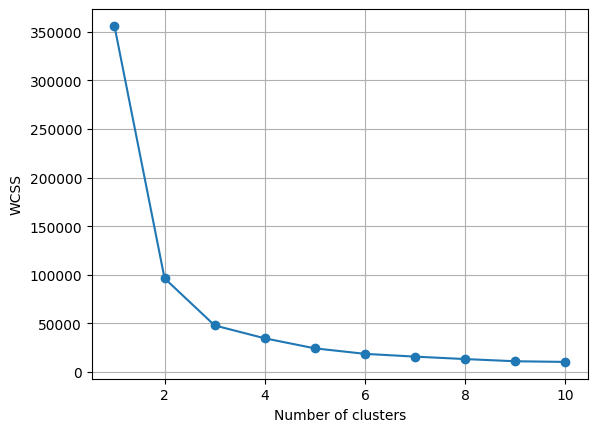

In [ ]:
plt.plot(range(1,11),wcss,'o-')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [ ]:
km=KMeans(n_clusters=3,n_init=10)
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [ ]:
cluster_labels=km.predict(x)

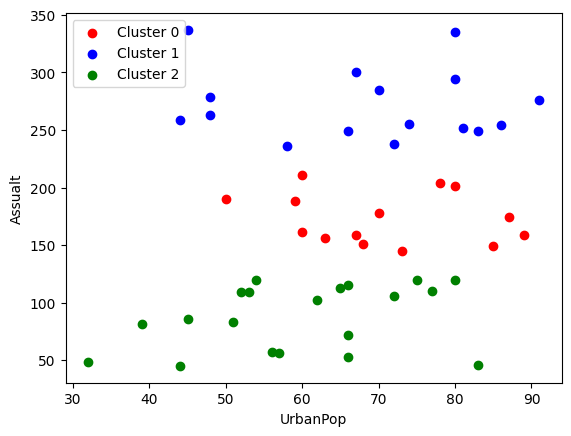

In [ ]:
colors=['r','b','g']
for i in range(max(cluster_labels)+1):
  cluster_data=x[cluster_labels==i]
  plt.scatter(cluster_data['UrbanPop'],
              cluster_data['Assault'],
              c=colors[i],
              label=f'Cluster {i}')
plt.xlabel('UrbanPop')
plt.ylabel('Assualt')
plt.legend()

In [ ]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [ ]:
mergins=linkage(x,method='ward')

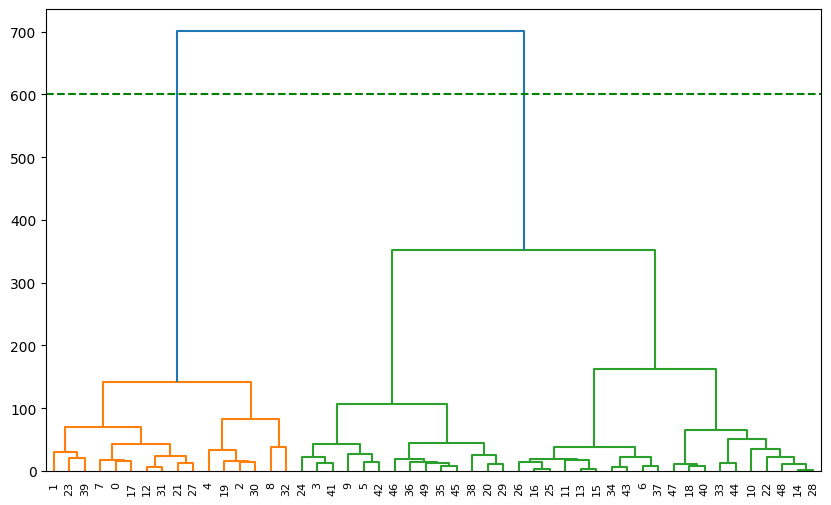

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(mergins)
plt.axhline(600,color='green',linestyle='--')
plt.show()

In [ ]:
cluster_labels=fcluster(mergins,600,criterion='distance')

In [ ]:
cluster_labels

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2], dtype=int32)

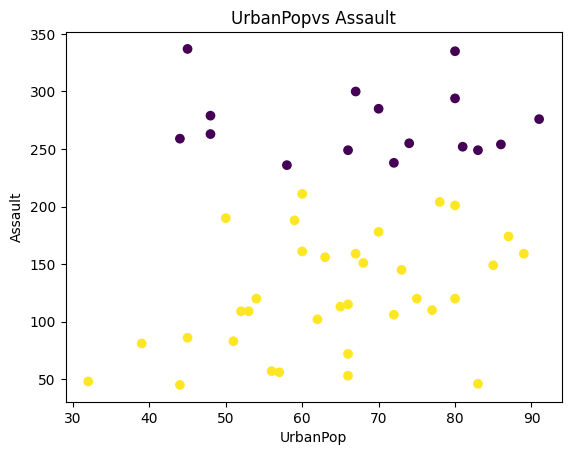

In [ ]:
plt.scatter(x['UrbanPop'],x['Assault'],c=cluster_labels)
plt.xlabel('UrbanPop')
plt.ylabel('Assault')
plt.title('UrbanPopvs Assault')
plt.show()